# Neural Net on V2 Data
- first neural net I built
- Uses articles to predict binary sentiment from Gdelt
- Best Epoch:
Epoch 3/5
102/102 [==============================] - 12s 117ms/step - loss: 0.4038 - accuracy: 0.8612 - val_loss: 0.6476 - val_accuracy: 0.8236

- I started with the easiest version of my problem, which was predicting from article to a GDELT tonal score

# Imports and installs

In [21]:
from tensorflow.keras import regularizers

In [48]:
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf

!pip install tensorflow-hub
!pip install tensorflow-datasets
import tensorflow_hub as hub

import tensorflow as tf

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

import pandas as pd

import spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 103 kB 4.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 3.4 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 177 kB 43.5 MB/s eta 0:00:01
     |████████████████████████████████| 44 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 100 kB 14.2 MB/s ta 0:00:01
  Created wheel for dill: filename=dill-0.3.2-py3-none-any.whl size=78912 sha256=56b66f7e9c84d0dc9179e9b308db21d30476ca2131f3d1e63a89a4a01ce475a1
  Stored in directory: /root/.cache/pip/wheels/72/6b/d5/5548aa1b73b8c3d176ea13f9f92066b02e82141549d90e2100
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21495 sha256=65ffa5f4ff686d3d4b6ec723b4b833db5547fc3ee26e4f1c2f792f2689c8642e
  Stored in directory: /root/.cache/pip/wheels/29/93/c6/762e359f8cb6a5b69c72235d798804cae523bbe41c2aa8333d
Successfully built dill promise
You should consid

In [2]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

In [4]:
#read in data and do test train split
df = pd.read_csv('text_tone_polarity.csv')

df.drop('Unnamed: 0', axis=1, inplace=True)

df['binary_polarity_numeric'] = np.where(df['binary_polarity']=='neg', 0, 1)

X = df['text']
y = df['binary_polarity_numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

### Building the Model

In [34]:
#loads Google News pretrained word embedding model
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [41]:
#define feed forward dense network architecture with drop and regularization
#I experimented with variations on this architecture in addition to what you see here
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1))

In [42]:
#compile model
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [43]:
#fit model
history = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
102/102 [==============================] - 12s 119ms/step - loss: 0.7372 - accuracy: 0.5637 - val_loss: 0.6364 - val_accuracy: 0.7487
Epoch 2/5
102/102 [==============================] - 12s 117ms/step - loss: 0.5818 - accuracy: 0.7424 - val_loss: 0.4934 - val_accuracy: 0.8251
Epoch 3/5
102/102 [==============================] - 12s 117ms/step - loss: 0.4038 - accuracy: 0.8612 - val_loss: 0.6476 - val_accuracy: 0.8236
Epoch 4/5
102/102 [==============================] - 12s 118ms/step - loss: 0.3008 - accuracy: 0.9053 - val_loss: 0.6240 - val_accuracy: 0.8330
Epoch 5/5
102/102 [==============================] - 12s 118ms/step - loss: 0.2346 - accuracy: 0.9411 - val_loss: 1.0097 - val_accuracy: 0.8294


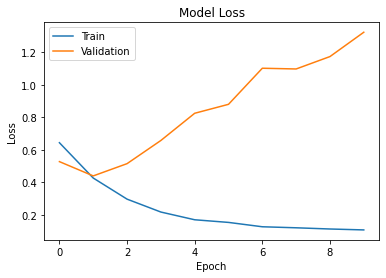

In [25]:
#plot model loss for training and validation sets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

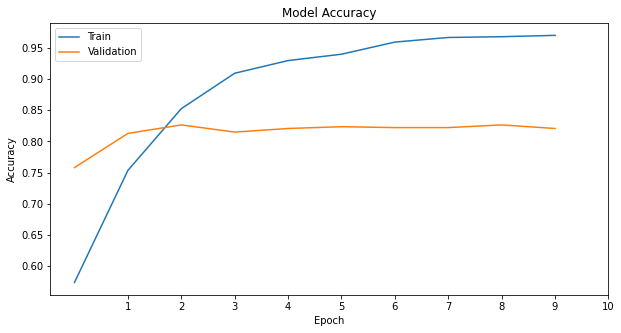

In [27]:
#plot model accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(range(1,11))
plt.legend(['Train', 'Validation'])
plt.show()